<a href="https://colab.research.google.com/github/codedmachine111/ML/blob/master/Image_processing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import matplotlib.pyplot as plt

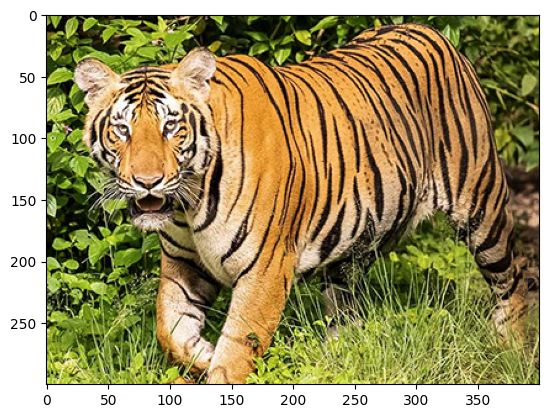

In [5]:
image = cv2.imread('/content/test.jpg') # Reads in BGR format

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [6]:
# Write an image

cv2.imwrite("/writtenimg.jpg", image)

True

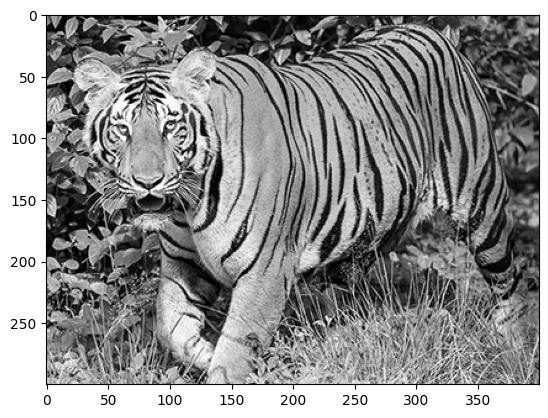

In [8]:
# RGB to Grayscale

gr_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rgb_img = cv2.cvtColor(gr_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

(128, 128, 3)


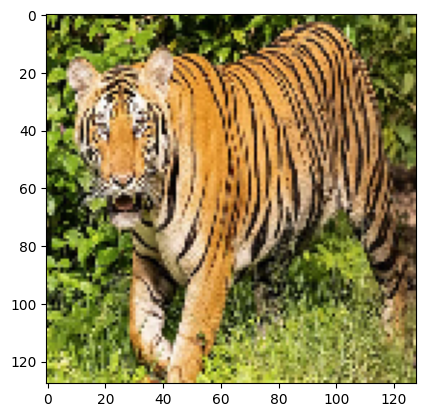

In [10]:
# Resize an image

resize = cv2.resize(image, (128,128))
cv2.imwrite('resized.jpg', resize)

rgb_img = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
print(rgb_img.shape)

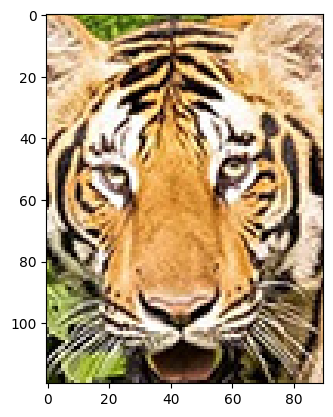

In [12]:
# Cropping an image

crop = image[40:160, 40:130]
cv2.imwrite('cropped.jpg', crop)

rgb_img = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

## Feature extraction and matching using ORB in cv2

In [15]:
import numpy as np

# Read both query image and training image
query_img = cv2.imread('/content/tajmahal.jpg')
train_img = cv2.imread('/content/tajmahal1.jpg')

# Convert to grayscale
query_gr = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)
train_gr = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)

# Initialize ORB detectior (Fast keypoint detector)
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_gr, None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_gr, None)

# Initialize matcher for matching keypoints (features of one image with other image)
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors, trainDescriptors)

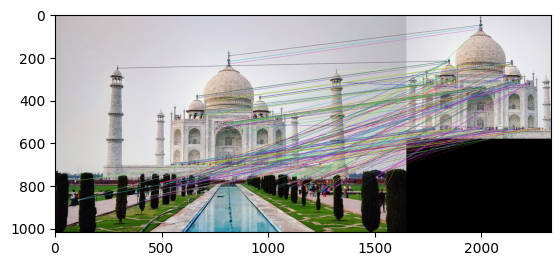

In [16]:
# Draw the matches on the final image containing both images

final_img = cv2.drawMatches(query_img, queryKeypoints, train_img, trainKeypoints, matches[:200], None)

final_rgb = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
plt.imshow(final_rgb)

## Feature extraction using SIFT (Scale-Invariant Feature Transform)

True

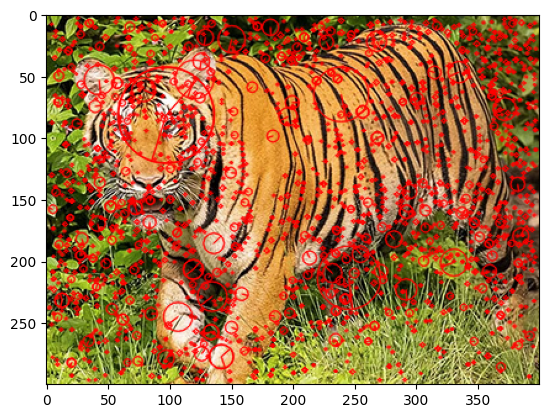

In [21]:
image = cv2.imread('/content/test.jpg')

# convert to grayscale
image_gr = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply SIFT
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(image_gr, None)

key_img = cv2.drawKeypoints(image, kp, None, color=(0,0,255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

key_img_rgb = cv2.cvtColor(key_img, cv2.COLOR_BGR2RGB)
plt.imshow(key_img_rgb)

cv2.imwrite('features.jpg', key_img_rgb)

# Histogram of an image

(256, 1)


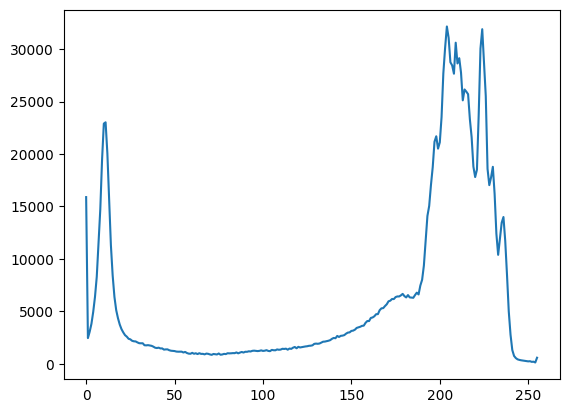

In [23]:
image = cv2.imread('/content/tajmahal.jpg')

hist = cv2.calcHist([image], [0], None, [256], [0,256])

print(hist.shape)

plt.plot(hist)

<BarContainer object of 256 artists>

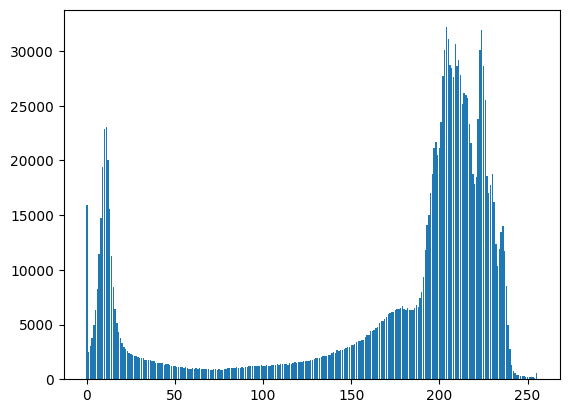

In [24]:
plt.bar(list(range(0,hist.shape[0])), hist[:,0])

## Histogram equalization

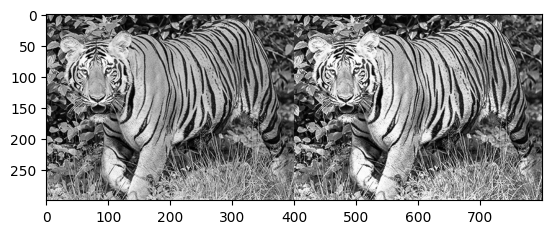

In [25]:
image = cv2.imread('/content/test.jpg',0)

equ = cv2.equalizeHist(image)
equ_hist = cv2.calcHist([equ], [0], None, [256], [0,256])

# Stack images side by side
res = np.hstack((image, equ))

# show image input vs output
rgb_img = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)

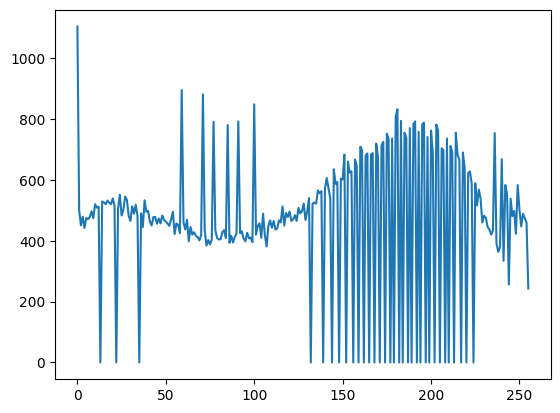

In [26]:
plt.plot(equ_hist)

## Morphological operation: Erosion and Dilation

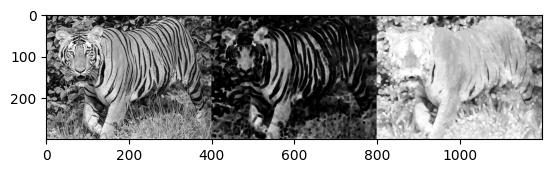

In [28]:
image = cv2.imread('/content/test.jpg',0)

kernel = np.ones(shape=(5,5), dtype=np.uint8)

img_erosion = cv2.erode(image, kernel, iterations=1)
img_dilation = cv2.dilate(image, kernel, iterations=1)

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rgb_ero = cv2.cvtColor(img_erosion, cv2.COLOR_BGR2RGB)
rgb_dil = cv2.cvtColor(img_dilation, cv2.COLOR_BGR2RGB)

res = np.hstack((rgb_img, rgb_ero, rgb_dil))

plt.imshow(res)

## Edge Detection

In [29]:
image = cv2.imread('/content/test.jpg')

# Converting the image to HSV (Hue, Saturation, Value) color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Edge detection
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

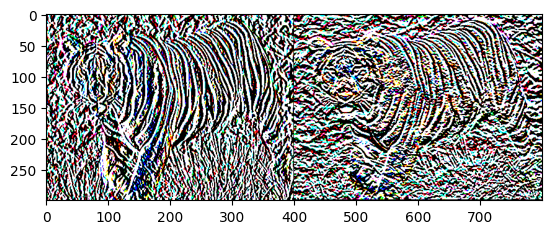

In [33]:
res = np.hstack((sobelx, sobely))
plt.imshow(res)

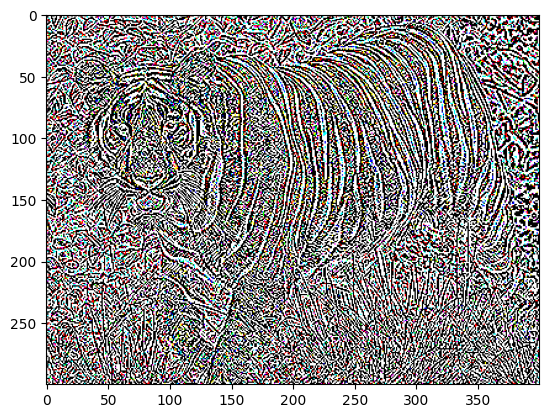

In [34]:
# Laplacian edge detection

laplacian = cv2.Laplacian(image, cv2.CV_64F)

plt.imshow(laplacian)

## Corner detection

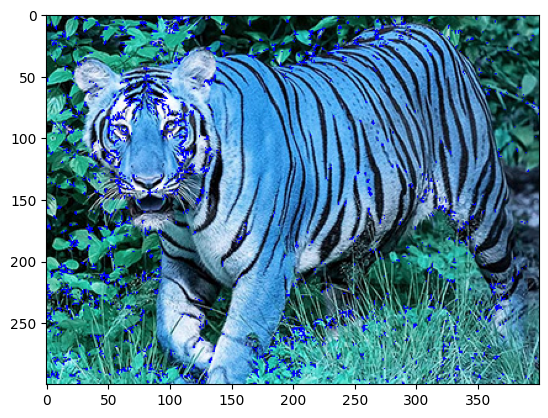

In [35]:
image = cv2.imread('/content/test.jpg')

img_gr = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Modify the data type
img_gr = np.float32(img_gr)

# Detect corners
dest = cv2.cornerHarris(img_gr, 2, 5, 0.07)

# Results are marked with diluted corners
image[dest >0.01 * dest.max()] = [0,0,255]

plt.imshow(image)

## Gaussian Blur

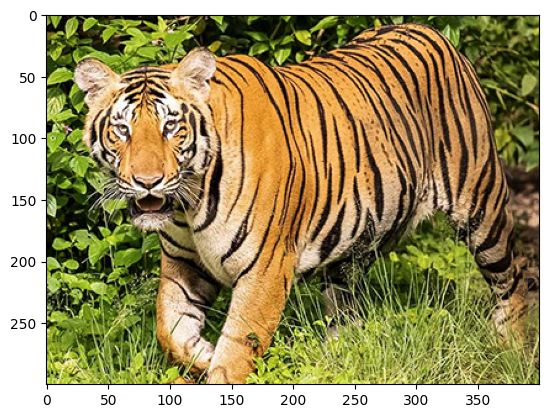

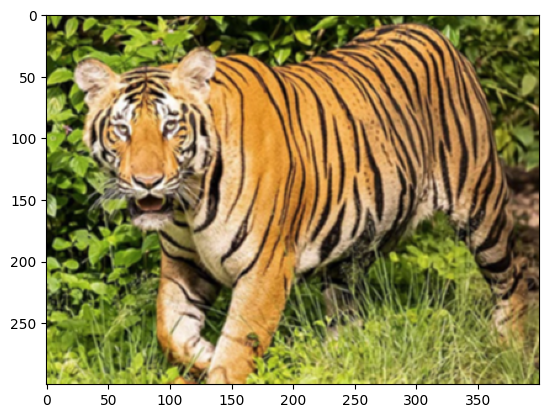

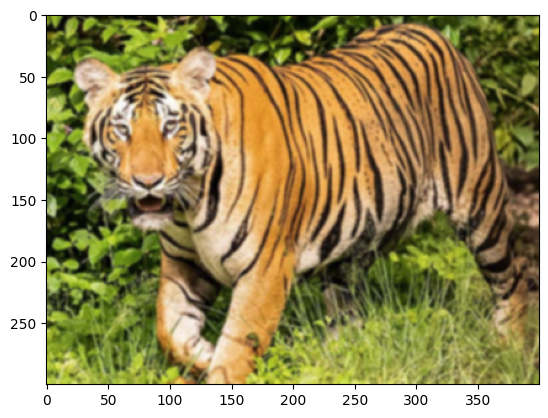

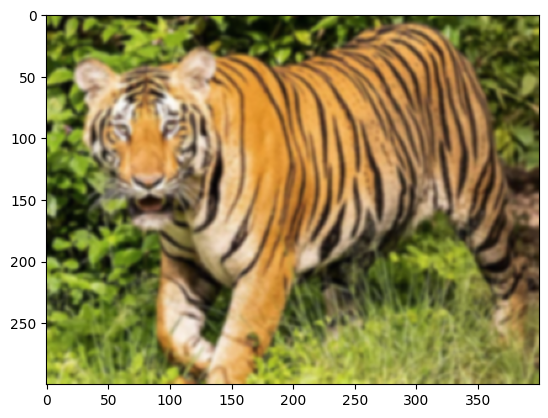

In [40]:
image = cv2.imread('/content/test.jpg')

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

# Gaussian Blur
Gaussian = cv2.GaussianBlur(image, (3,3), 0)
rgb_img = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

Gaussian = cv2.GaussianBlur(image, (5,5), 0)
rgb_img = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

Gaussian = cv2.GaussianBlur(image, (7, 7), 0)
rgb_img = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

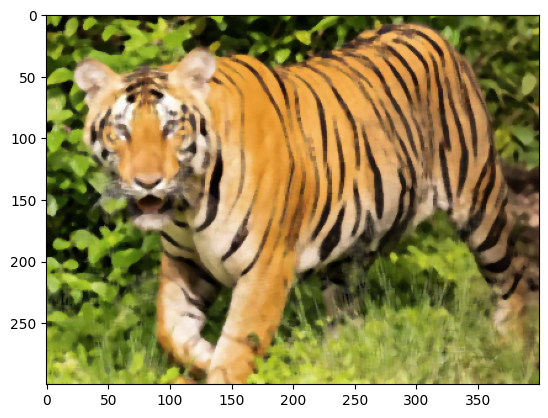

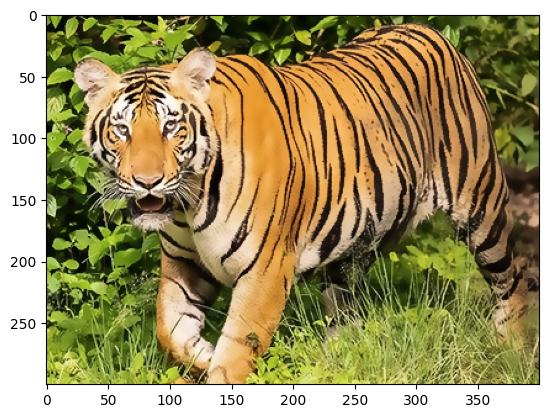

In [41]:
# Median Blur
median = cv2.medianBlur(image, 5)
rgb_img = cv2.cvtColor(median, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()


# Bilateral Blur
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
rgb_img = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

## Image Denoising

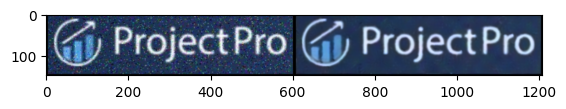

In [43]:
noisy_img = cv2.imread('/content/noisy.png')

denoised_img = cv2.fastNlMeansDenoisingColored(noisy_img, None, 20,20,7,21)

rgb_d_img = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB)
rgb_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)

res = np.hstack((rgb_img, rgb_d_img))
plt.imshow(res)